モンテカルロ・シミュレーションとは、乱数列をもとにした推定方法。$\\$
乱数列を発生させるものを乱数ジェネレーター（Random Number Generators）といい、発生させる乱数列の性質によって以下の３つに分けられる。$\\$

（1）真の乱数列...放射線元素の崩壊、大気のノイズなどから得られる。数字を得るのに時間がかかるが、予測不可能で再現性も困難。（例）くじ引き、ギャンブル、暗号鍵の生成など、高度なランダム性。$\\$

（2）擬似乱数列...コンピュータアルゴリズムで生成する。真の意味でのランダム性はないが、大量の乱数を短時間で生成できる。予測可能性は統計テストで判断する。アルゴリズムで決定論的に生成するのでパターンが存在するが、良いアルゴリズムは非常に長いシークエンスを持つ。擬似乱数列は、コンピュータゲームやモンテカルロシミュレーションで利用される。$\\$

（3）準乱数列...ランダムではなく、区間内でなるべく一様になるように考案された確定的な数列。擬似乱数列と比較すると、標準誤差が$\cfrac{1}{\sqrt{N}}$でなく$\cfrac{1}{N}$のオーダーとなるので、真の値への収束スピードが早い。数値積分やデリバティブの評価などで使われる。

乱数は以下の点を考えることが重要$\\$
1. ランダム性$\\$
2. シークエンスの長さ$\\$
3. 計算スピード$\\$
4. 再現性$\\$
5. 移植性$\\$

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt


線形合同ジェネレーター（Linear Congruential Generator）$\\$
...最も基本的な乱数ジェネレーターで、以下のアルゴリズムで一様乱数を発生させる。$\\$

$x_{i+1}=ax_i\ \ \text{mod}\ \ m\\
u_{i+1}=\cfrac{x_{i+1}}{m}$

0, X:6, U:0.545455
1, X:3, U:0.272727
2, X:7, U:0.636364
3, X:9, U:0.818182
4, X:10, U:0.909091
5, X:5, U:0.454545
6, X:8, U:0.727273
7, X:4, U:0.363636
8, X:2, U:0.181818
9, X:1, U:0.090909
10, X:6, U:0.545455
11, X:3, U:0.272727
12, X:7, U:0.636364
13, X:9, U:0.818182
14, X:10, U:0.909091
15, X:5, U:0.454545
16, X:8, U:0.727273
17, X:4, U:0.363636
18, X:2, U:0.181818
19, X:1, U:0.090909
20, X:6, U:0.545455
21, X:3, U:0.272727
22, X:7, U:0.636364
23, X:9, U:0.818182
24, X:10, U:0.909091
25, X:5, U:0.454545
26, X:8, U:0.727273
27, X:4, U:0.363636
28, X:2, U:0.181818
29, X:1, U:0.090909
30, X:6, U:0.545455
31, X:3, U:0.272727
32, X:7, U:0.636364
33, X:9, U:0.818182
34, X:10, U:0.909091
35, X:5, U:0.454545
36, X:8, U:0.727273
37, X:4, U:0.363636
38, X:2, U:0.181818
39, X:1, U:0.090909
40, X:6, U:0.545455
41, X:3, U:0.272727
42, X:7, U:0.636364
43, X:9, U:0.818182
44, X:10, U:0.909091
45, X:5, U:0.454545
46, X:8, U:0.727273
47, X:4, U:0.363636
48, X:2, U:0.181818
49, X:1, U:0.090909
50, X

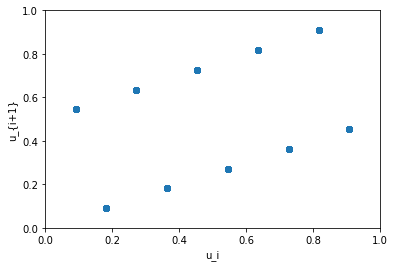

In [22]:
# パラメータ
N = 1000 # サンプル数
a = 6 # 係数
m = 11 # 法
umax = 1 # uの上限値
# 初期値
x = 1
u = 1
uvec = []

# 線形合同ジェネレーター（Liner Congruential Generator）

for i in range(N):
    x = ((a*x) % m)
    u = x / m
    print(str(i) + ', X:' + str(x)+ ', U:' + '{:.6f}'.format(u))
    uvec.append(u)
    
    while u > umax:
        x = ((a*x) % m)
        u = x / m
        print(str(i) + ', X:' + str(x)+ ', U:' + '{:.6f}'.format(u))
    uvec.append(u)

uvec1 = uvec[::2] # uの情報のみ抽出
uvec2 = uvec1[1:] + uvec1[:1]

plt.scatter(uvec1, uvec2)
plt.xlabel('u_i')
plt.ylabel('u_{i+1}')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

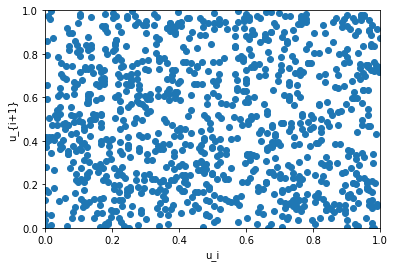

In [23]:
# ランダム性があり、シークエンスの長いaとmの組み合わせ

# パラメータ
N = 1000 # サンプル数
a = 123 # 係数
m = 1234567 # 法
umax = 1 # uの上限値
# 初期値
x = 1
u = 1
uvec = []

# 線形合同ジェネレーター（Liner Congruential Generator）

for i in range(N):
    x = ((a*x) % m)
    u = x / m
    # print(str(i) + ', X:' + str(x)+ ', U:' + '{:.6f}'.format(u))
    uvec.append(u)
    
    while u > umax:
        x = ((a*x) % m)
        u = x / m
        # print(str(i) + ', X:' + str(x)+ ', U:' + '{:.6f}'.format(u))
    uvec.append(u)

uvec1 = uvec[::2] # uの情報のみ抽出
uvec2 = uvec1[1:] + uvec1[:1]

plt.scatter(uvec1, uvec2)
plt.xlabel('u_i')
plt.ylabel('u_{i+1}')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

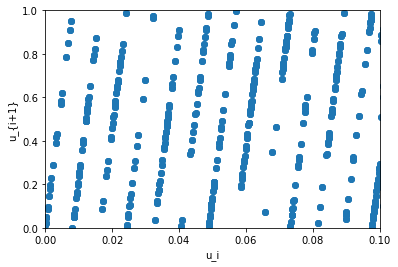

In [33]:
# uの上限値を0.1に変えると、格子状のパターンが出てしまう

# パラメータ
N = 10000 # サンプル数
a = 123 # 係数
m = 1234567 # 法
umax = 0.1 # uの上限値
# 初期値
x = 1
u = 1
uvec = []

# 線形合同ジェネレーター（Liner Congruential Generator）

for i in range(N):
    x = ((a*x) % m)
    u = x / m
    # print(str(i) + ', X:' + str(x)+ ', U:' + '{:.6f}'.format(u))
    uvec.append(u)
    
    while u > umax:
        x = ((a*x) % m)
        u = x / m
        # print(str(i) + ', X:' + str(x)+ ', U:' + '{:.6f}'.format(u))
    uvec.append(u)

uvec1 = uvec[::2] # uの情報のみ抽出
uvec2 = uvec1[1:] + uvec1[:1]

plt.scatter(uvec1, uvec2)
plt.xlabel('u_i')
plt.ylabel('u_{i+1}')
plt.xlim(0, 0.1)
plt.ylim(0, 1)
plt.show()

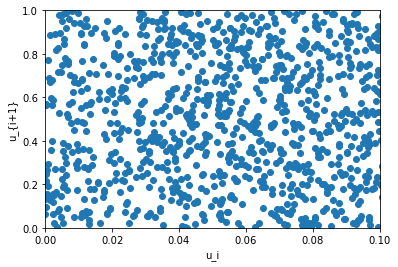

In [32]:
# uの上限値を0.1でも、a=16807、m=2147483647に変えると、それなりにランダムに

# パラメータ
N = 10000 # サンプル数
a = 16807 # 係数
m = 2147483647 # 法
umax = 0.1 # uの上限値
# 初期値
x = 1
u = 1
uvec = []

# 線形合同ジェネレーター（Liner Congruential Generator）

for i in range(N):
    x = ((a*x) % m)
    u = x / m
    # print(str(i) + ', X:' + str(x)+ ', U:' + '{:.6f}'.format(u))
    uvec.append(u)
    
    while u > umax:
        x = ((a*x) % m)
        u = x / m
        # print(str(i) + ', X:' + str(x)+ ', U:' + '{:.6f}'.format(u))
    uvec.append(u)

uvec1 = uvec[::2] # uの情報のみ抽出
uvec2 = uvec1[1:] + uvec1[:1]

plt.scatter(uvec1, uvec2)
plt.xlabel('u_i')
plt.ylabel('u_{i+1}')
plt.xlim(0, 0.1)
plt.ylim(0, 1)
plt.show()

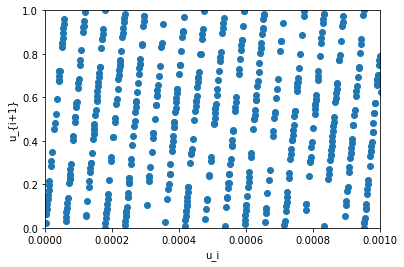

In [35]:
# uの上限値を0.001に変えると、また格子パターン出現（可視化のためサンプル数多めで計算重い）

# パラメータ
N = 500000 # サンプル数
a = 16807 # 係数
m = 2147483647 # 法
umax = 0.001 # uの上限値
# 初期値
x = 1
u = 1
uvec = []

# 線形合同ジェネレーター（Liner Congruential Generator）

for i in range(N):
    x = ((a*x) % m)
    u = x / m
    # print(str(i) + ', X:' + str(x)+ ', U:' + '{:.6f}'.format(u))
    uvec.append(u)
    
    while u > umax:
        x = ((a*x) % m)
        u = x / m
        # print(str(i) + ', X:' + str(x)+ ', U:' + '{:.6f}'.format(u))
    uvec.append(u)

uvec1 = uvec[::2] # uの情報のみ抽出
uvec2 = uvec1[1:] + uvec1[:1]

plt.scatter(uvec1, uvec2)
plt.xlabel('u_i')
plt.ylabel('u_{i+1}')
plt.xlim(0, 0.001)
plt.ylim(0, 1)
plt.show()

（注）要するに、$(a,m)$の組み合わせで最適なものを見つけることは難しく、線形合同ジェネレーターは微妙。（他には、ランダム性に優れたL'Ecuyer級数などもある）

(array([80., 62., 67., 63., 67., 57., 49., 75., 63., 56., 57., 63., 74.,
        57., 40., 70.]),
 array([4.48302690e-04, 6.29162026e-02, 1.25384102e-01, 1.87852002e-01,
        2.50319902e-01, 3.12787802e-01, 3.75255702e-01, 4.37723602e-01,
        5.00191502e-01, 5.62659402e-01, 6.25127302e-01, 6.87595201e-01,
        7.50063101e-01, 8.12531001e-01, 8.74998901e-01, 9.37466801e-01,
        9.99934701e-01]),
 <BarContainer object of 16 artists>)

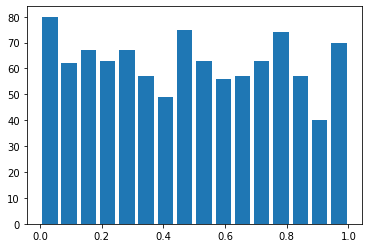

In [40]:
# Pythonの一様乱数
uni_rn = np.random.uniform(0, 1, 1000) # 最小値0、最大値1の一様乱数を1000個発生
plt.hist(uni_rn, bins=16, rwidth=0.8)

# bins: 棒の数を 16 に指定、  range(, ): 下限、上限を設定、 normed=True: 正規化、 cumulative=True: 累積
# bottom=30: 側の余白を 30 に設定、   rwidth=0.8: 棒の幅を 0.8 に設定、 color="red"

(array([  9.,  31.,  49.,  79., 123., 130., 175., 144., 111.,  75.,  39.,
         24.,   8.,   0.,   1.,   2.]),
 array([24.18716766, 28.21184588, 32.23652409, 36.26120231, 40.28588052,
        44.31055873, 48.33523695, 52.35991516, 56.38459338, 60.40927159,
        64.4339498 , 68.45862802, 72.48330623, 76.50798445, 80.53266266,
        84.55734087, 88.58201909]),
 <BarContainer object of 16 artists>)

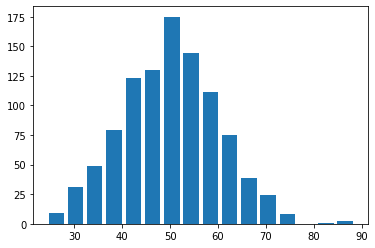

In [38]:
# Pythonの正規乱数
norm_rn = np.random.normal(50, 10, 1000) # 平均50、標準偏差10の正規乱数を1000個発生
plt.hist(norm_rn, bins=16, rwidth=0.8)

その他の確率分布$\\$
ベータ分布: random.betavariate()$\\$
指数分布: random.expovariate()$\\$
ガンマ分布: random.gammavariate()$\\$
ガウス分布: random.gauss()$\\$
対数正規分布: random.lognormvariate()$\\$
正規分布: random.normalvariate()$\\$
フォン・ミーゼス分布: random.vonmisesvariate()$\\$
パレート分布: random.paretovariate()$\\$
ワイブル分布: random.weibullvariate()